In [3]:
import pandas as pd
from io import BytesIO

# Dữ liệu từ bảng LaTeX
data = {
    "No.": list(range(1, 21)),
    "No Control Mean": [186, 203, 217, 227, 202, 178, 185, 226, 175, 206, 188, 211, 219, 170, 187, 216, 177, 228, 190, 194],
    "No Control Std": [5, 6, 7, 8, 6, 5, 5, 7, 6, 7, 5, 6, 7, 5, 6, 7, 5, 8, 5, 6],
    "e-greedy Mean": [179, 173, 175, 181, 173, 195, 178, 180, 214, 183, 173, 182, 175, 172, 182, 170, 192, 169, 179, 180],
    "e-greedy Std": [4, 5, 5, 6, 5, 7, 4, 5, 8, 5, 4, 5, 5, 6, 5, 5, 6, 5, 4, 5],
    "SARSA Mean": [171, 171, 177, 181, 177, 173, 174, 173, 169, 175, 167, 170, 172, 170, 175, 179, 174, 172, 175, 170],
    "SARSA Std": [3, 4, 4, 5, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4],
    "DQN Mean": [165, 160, 162, 170, 168, 160, 162, 161, 155, 160, 155, 160, 158, 160, 165, 160, 160, 150, 160, 158],
    "DQN Std": [2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3],
    "D-DOC Mean": [160, 155, 157, 165, 162, 157, 158, 155, 152, 158, 152, 157, 154, 158, 162, 158, 157, 148, 158, 155],
    "D-DOC Std": [2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2]
}

df = pd.DataFrame(data)

# Xuất ra file Excel
output = BytesIO()
with pd.ExcelWriter(output, engine='xlsxwriter') as writer:
    df.to_excel(writer, sheet_name='Simulation Data', index=False)

output.seek(0)

# Hiển thị file cho người dùng tải về
output_file = "simulation_data.xlsx"
with open(output_file, "wb") as f:
    f.write(output.getbuffer())

output_file


'simulation_data.xlsx'

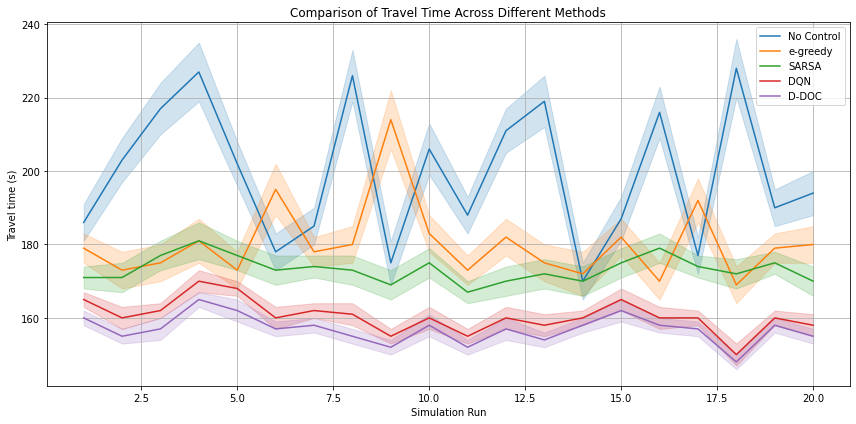

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
file_path = 'simulation_data.xlsx'  # Đổi đường dẫn tới file Excel của bạn
df = pd.read_excel(file_path)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ các đường line chính
plt.plot(df['No.'], df['No Control Mean'], label='No Control', color='tab:blue')
plt.plot(df['No.'], df['e-greedy Mean'], label='e-greedy', color='tab:orange')
plt.plot(df['No.'], df['SARSA Mean'], label='SARSA', color='tab:green')
plt.plot(df['No.'], df['DQN Mean'], label='DQN', color='tab:red')
plt.plot(df['No.'], df['D-DOC Mean'], label='D-DOC', color='tab:purple')

# Tô vùng sai số (std)
plt.fill_between(df['No.'], df['No Control Mean'] - df['No Control Std'], df['No Control Mean'] + df['No Control Std'], color='tab:blue', alpha=0.2)
plt.fill_between(df['No.'], df['e-greedy Mean'] - df['e-greedy Std'], df['e-greedy Mean'] + df['e-greedy Std'], color='tab:orange', alpha=0.2)
plt.fill_between(df['No.'], df['SARSA Mean'] - df['SARSA Std'], df['SARSA Mean'] + df['SARSA Std'], color='tab:green', alpha=0.2)
plt.fill_between(df['No.'], df['DQN Mean'] - df['DQN Std'], df['DQN Mean'] + df['DQN Std'], color='tab:red', alpha=0.2)
plt.fill_between(df['No.'], df['D-DOC Mean'] - df['D-DOC Std'], df['D-DOC Mean'] + df['D-DOC Std'], color='tab:purple', alpha=0.2)

# Định dạng biểu đồ
plt.xlabel('Simulation Run')
plt.ylabel('Travel time (s)')
plt.title('Comparison of Travel Time Across Different Methods')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()
